In [9]:
import pandas as pd
data = pd.read_csv('/content/Insurance dataset.csv')

In [10]:
data.shape

(45211, 11)

In [11]:
data.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [12]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

Every datatypes of the features are correct and no need of any d.type conversion required.

In [13]:
duplicates = data[data.duplicated()]
duplicates.shape[0]  #there  is 6 duplicates in the dataset

6

In [14]:
data = data.drop_duplicates()

In [15]:
data.shape

(45205, 11)

In [16]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There is no null values in the dataset

# Data cleaning part

Age column


In [17]:
data.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

job column

In [18]:
data.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Here it can be observed that unknown category can be considered as nan value and we can impute it with mode of the datset as it is less significant.

In [19]:
data.job = data.job.str.replace("unknown","blue-collar")# imputing unknown value with mode of the feature

<ipython-input-19-e39f4baa3080>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.job = data.job.str.replace("unknown","blue-collar")# imputing unknown value with mode of the feature


In [20]:
data.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [21]:
data.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [22]:
data.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

Here too we can impute unknown value with mode of the feature since it is less significant

In [23]:
data.education_qual = data.education_qual.str.replace("unknown","secondary")# imputing unknown value with mode of the feature

In [24]:
data.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [25]:
data.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In call_type unknown values can be considered as separate category as it's count were significant(29%)

In [26]:
data.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [27]:
data.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [28]:
data.dur.value_counts()

124     187
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [29]:
data.num_calls.value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [30]:
data.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

Here unknown values are more significant hence imputing to mode will not be right option hence we'll consider it as separate category.

In [31]:
data.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

Percentage of Yes and No
no     88.299967
yes    11.700033
Name: y, dtype: float64


Text(0.5, 1.0, 'Target Variable')

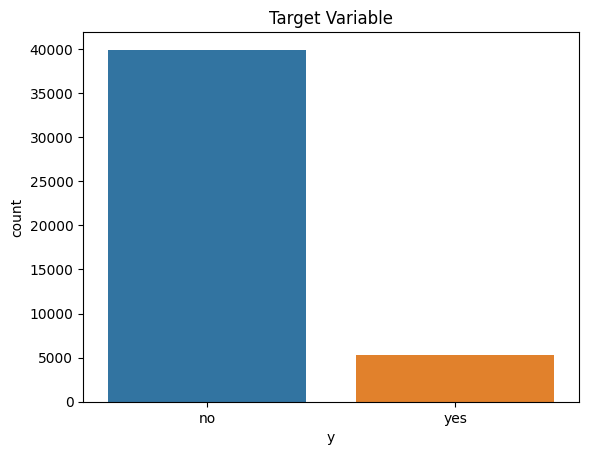

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Percentage of Yes and No")
percent = data.y.value_counts()/len(data)*100
print(percent)
sns.countplot(x = 'y' ,data=data )
plt.title('Target Variable')

This target results shows that it is imbalanced dataset

#  Outlier detection in cont.features


Outliers are data points that deviate significantly from the majority, potentially due to errors or extreme values. They can impact analyses and models, and can be detected using statistical methods or visual inspection.Here IQR method is employed to find the outliers and they are imputed to max.threshold using clipping.

In [33]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [34]:
import scipy.stats as stats
def outliers_det(feature_name):
  Iqr = data[feature_name].quantile(0.75) - data[feature_name].quantile(0.25)
  max_threshold = data[feature_name].quantile(0.75) + (1.5 * Iqr)
  min_threshold = data[feature_name].quantile(0.25) - (1.5 * Iqr)
  outliers = data.loc[(data[feature_name] > max_threshold) | (data[feature_name] < min_threshold)]
  no_of_outliers = outliers.shape[0]
  result = (f"No of outliers in {feature_name}: {no_of_outliers}")
  skewness = stats.skew(data[feature_name])
  skew = (f"Skewness:, {skewness}")

  return max_threshold, min_threshold, result,skew


Age column

In [35]:
outliers_det('age')

(70.5, 10.5, 'No of outliers in age: 487', 'Skewness:, 0.6846225907576436')

In [36]:
#age above 70 (487 datas are there) can be imputed to max threshold  in data set
data.age= data.age.clip(10.5,65) # clippping the outliers to max and min threshold


In [37]:
outliers_det('age')

(70.5, 10.5, 'No of outliers in age: 0', 'Skewness:, 0.42856242442147346')

Day column

In [38]:
outliers_det('day')

(40.5, -11.5, 'No of outliers in day: 0', 'Skewness:, 0.09300545215702359')

As it can be seen that no outliers in day column

Dur column

In [39]:
outliers_det('dur')

(643.0, -221.0, 'No of outliers in dur: 3235', 'Skewness:, 3.144041014830494')

In [40]:
#duration above 639.5(3193 datas are there) can be imputed to max threshold  in data set
data.dur= data.dur.clip(-221,643.0) # clippping the outliers to max and min threshold


In [41]:
outliers_det('dur')

(643.0, -221.0, 'No of outliers in dur: 0', 'Skewness:, 1.0373749916112796')

Num_calls column

In [42]:
outliers_det('num_calls')

(6.0,
 -2.0,
 'No of outliers in num_calls: 3064',
 'Skewness:, 4.8982901462296935')

In [43]:
data.num_calls= data.num_calls.clip(-2,6.0) # clippping the outliers to max and min threshold

In [44]:
outliers_det('num_calls')

(6.0, -2.0, 'No of outliers in num_calls: 0', 'Skewness:, 1.099109381055628')

outliers in all cont.features are cleared

# EDA part

def functions for finding prob, barchart displaying and outlier detection

In [45]:
data['y']=data['y'].map({'no':0,'yes':1})# as we need to find mean value we'll do this encoding earlier

In [46]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0


In [48]:
def prob(feature_name):
    conversion_rates = data.groupby(feature_name)['y'].mean()
    sorted_rate = conversion_rates.reset_index().sort_values('y')
    return sorted_rate[[feature_name, 'y']]


In [49]:
def bar_plot(feature_name):
  conversion_rates = data.groupby(feature_name)['y'].mean()
  sorted_rate = conversion_rates.reset_index().sort_values('y')[feature_name]
  plt.figure(figsize= (12,6))
  sns.barplot(x =feature_name,y = 'y', data=data,order = sorted_rate)
  plt.show()

In [50]:
import matplotlib.pyplot as plt

def feature_dist(feature_name):
 feature_data = data[feature_name]
 plt.hist(feature_data, bins='auto')
 plt.xlabel('Feature Values')
 plt.ylabel('Frequency')
 plt.title(f'Self-Distribution of {feature_name}')
 plt.grid(True)
 plt.xticks(rotation=90)
 plt.show()


age column - self disribution and comaprision with target

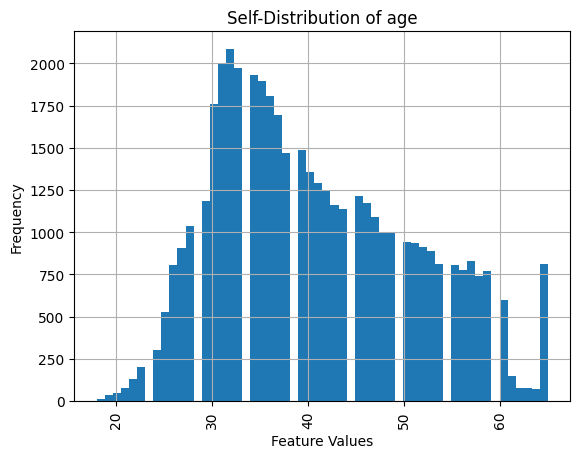

In [51]:
feature_dist('age')

test

In [52]:
def proba_c(feature_name):
    conversion_rates = data.groupby(feature_name)['y'].mean()
    success_counts = data[data['y'] == 1 ].groupby(feature_name)['y'].count().rename('success_counts')
    result = pd.concat([conversion_rates, success_counts], axis=1)
    return result


In [53]:
proba_c('mon')

,y,success_counts
mon,,
apr,0.196794,577
aug,0.110168,688
dec,0.467290,100
feb,0.166478,441
jan,0.101212,142
jul,0.090949,627
jun,0.102266,546
mar,0.519916,248
may,0.067199,925


In [54]:
prob('age')

,age,y
32,50,0.076677
26,44,0.081866
30,48,0.082247
33,51,0.082265
22,40,0.085609
27,45,0.087171
38,56,0.087404
25,43,0.088717
24,42,0.089372
23,41,0.092951


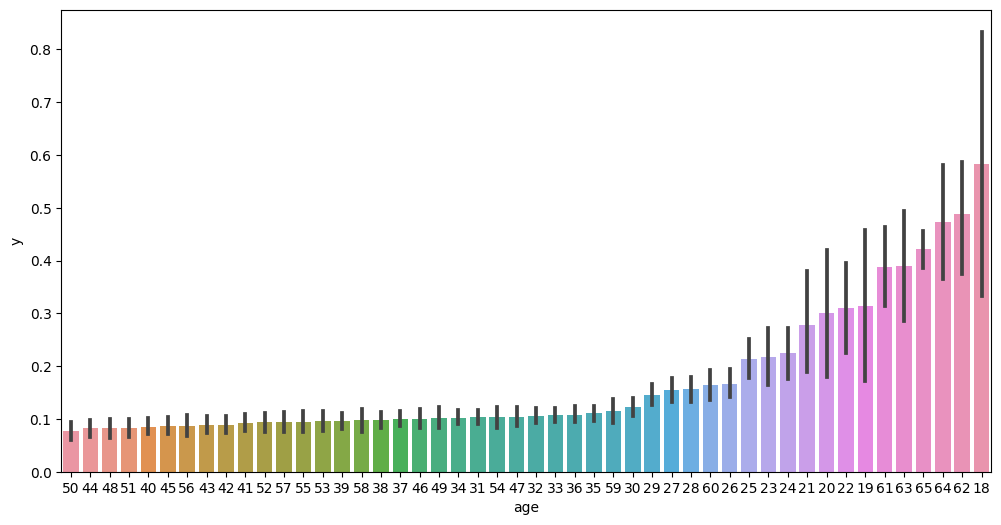

In [55]:
bar_plot('age')

From above bar chart it is observed that people aged below 30 and aged in range[60-65] have high probablility of conversion

Job column - self distribution and comparision with outcome

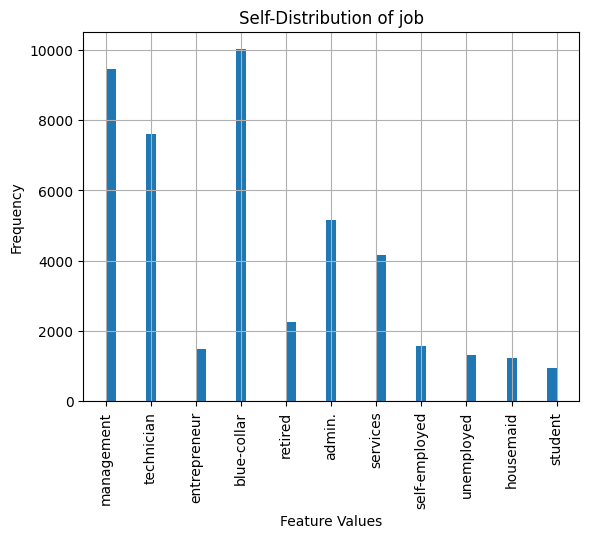

In [56]:
feature_dist('job')

In [57]:
prob('job')

,job,y
1,blue-collar,0.074067
2,entrepreneur,0.082717
3,housemaid,0.087903
7,services,0.088851
9,technician,0.110585
6,self-employed,0.118429
0,admin.,0.122050
4,management,0.137570
10,unemployed,0.155027
5,retired,0.227915


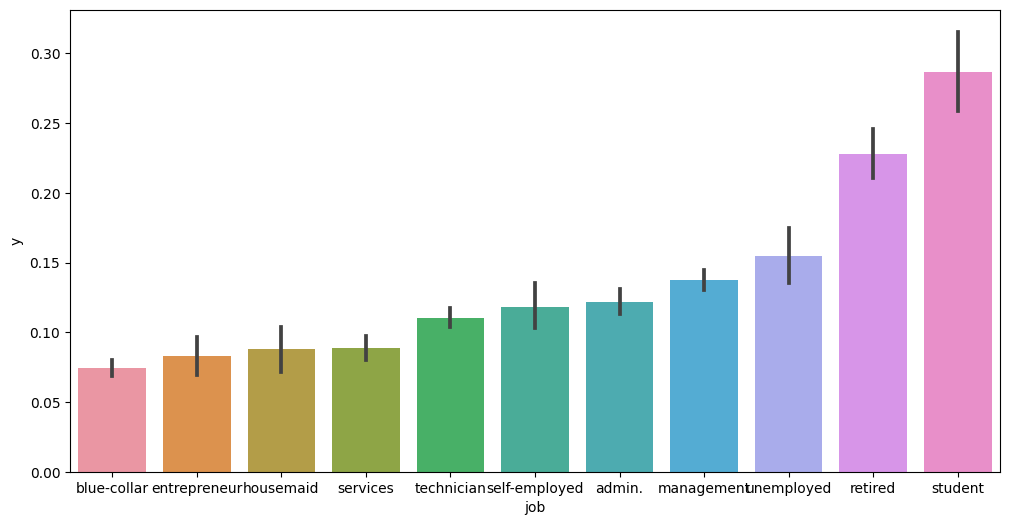

In [58]:
bar_plot('job')

It is observed that students,retired and unemployed people's conversion rates are more higher

marital column - self distribution and comparision with outcome

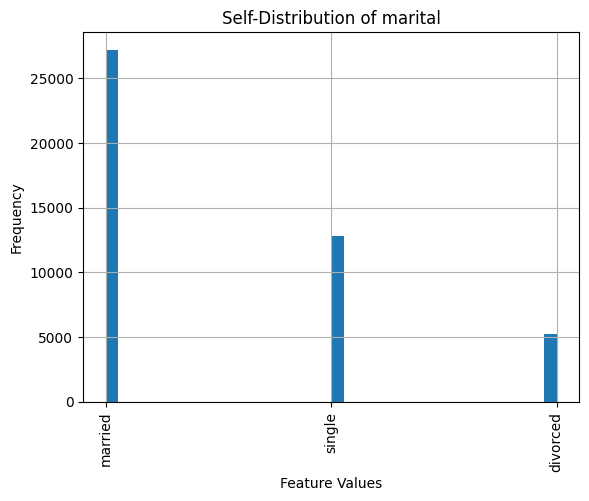

In [59]:
feature_dist('marital')

In [60]:
prob('marital')

,marital,y
1,married,0.101250
0,divorced,0.119455
2,single,0.149515


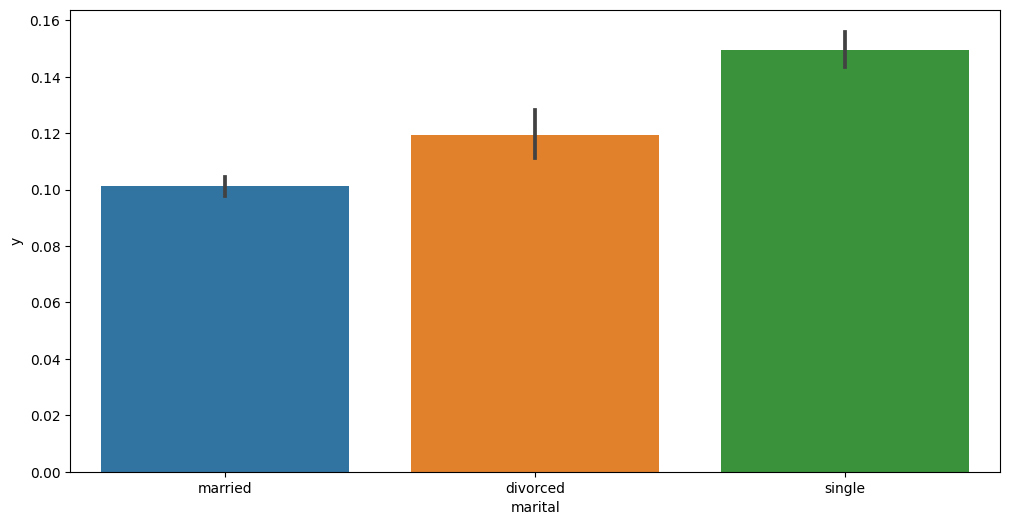

In [61]:
bar_plot('marital')

education - column comparision with target

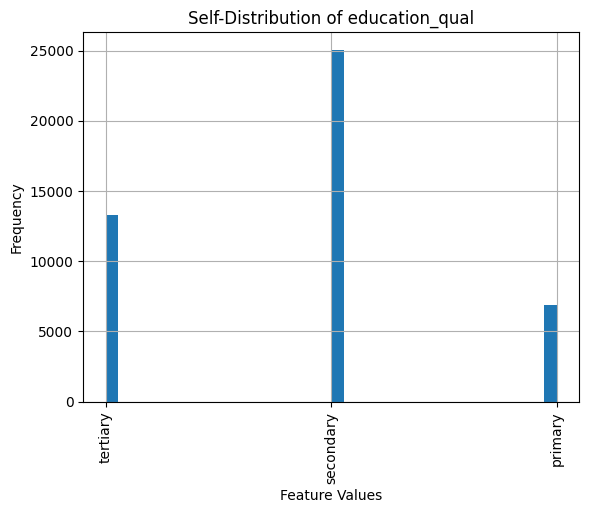

In [62]:
feature_dist('education_qual')

In [63]:
prob('education_qual')

,education_qual,y
0,primary,0.086277
1,secondary,0.107838
2,tertiary,0.150086


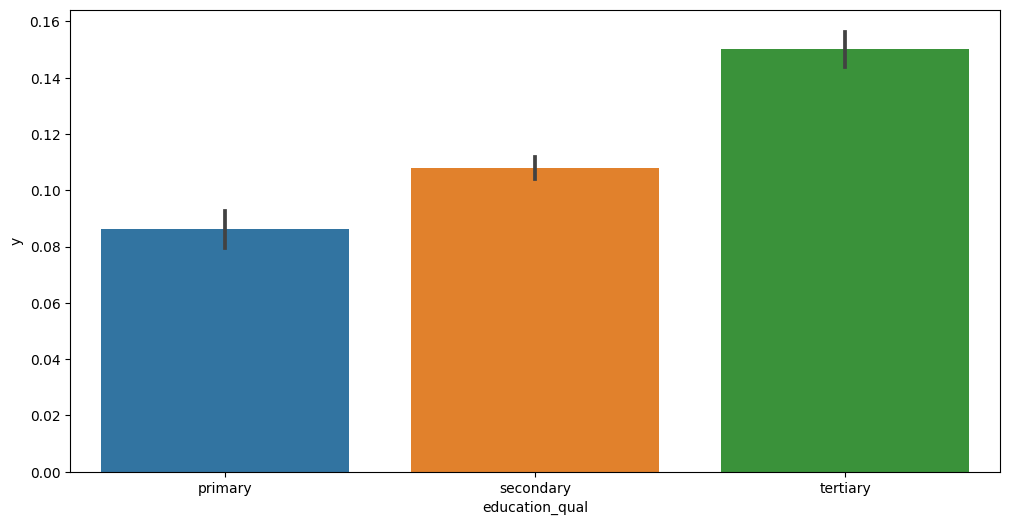

In [64]:
bar_plot('education_qual')

It is evident that educational qualification plays vital role in purchasing insurance products it is concluded that people with higher education were quite aware about insurance.

call_type - column comparision with target

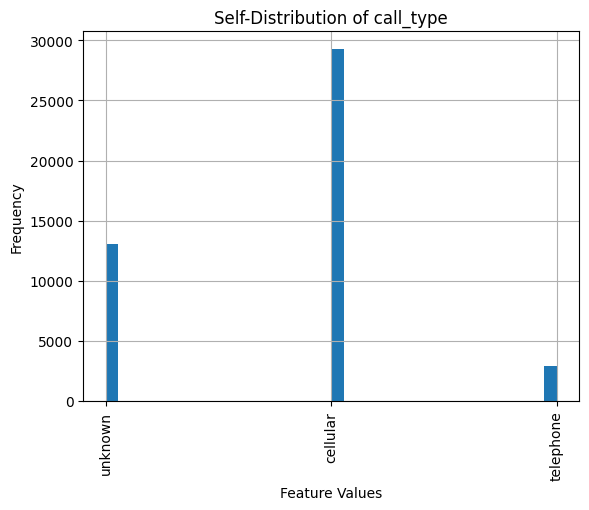

In [65]:
feature_dist('call_type')

In [66]:
prob('call_type')

,call_type,y
2,unknown,0.040716
1,telephone,0.134205
0,cellular,0.149204


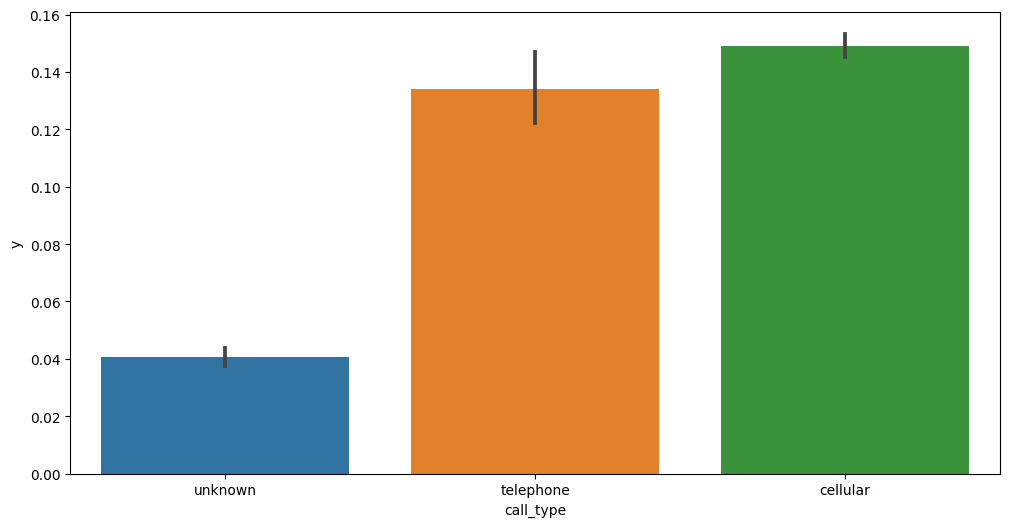

In [67]:
bar_plot('call_type')

It can be observed that cellular communication have higher prob of converting customer this can be because of ease of communicating long dur calls, cont.follow up's.


day - column comparoision with target

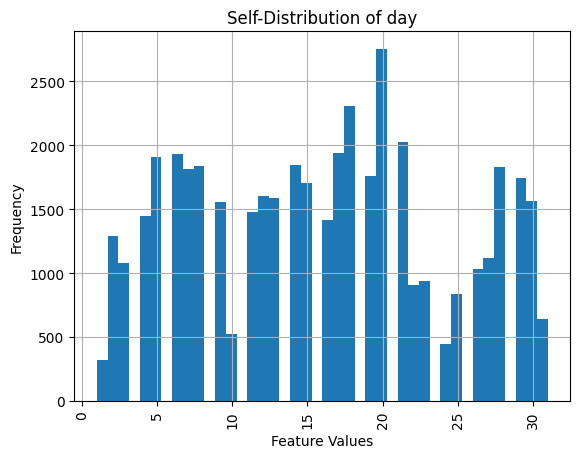

In [68]:
feature_dist('day')

In [69]:
prob('day')

,day,y
18,19,0.069476
19,20,0.069767
30,31,0.071540
28,29,0.073926
27,28,0.078185
6,7,0.086406
16,17,0.090768
5,6,0.093685
17,18,0.098787
20,21,0.099210


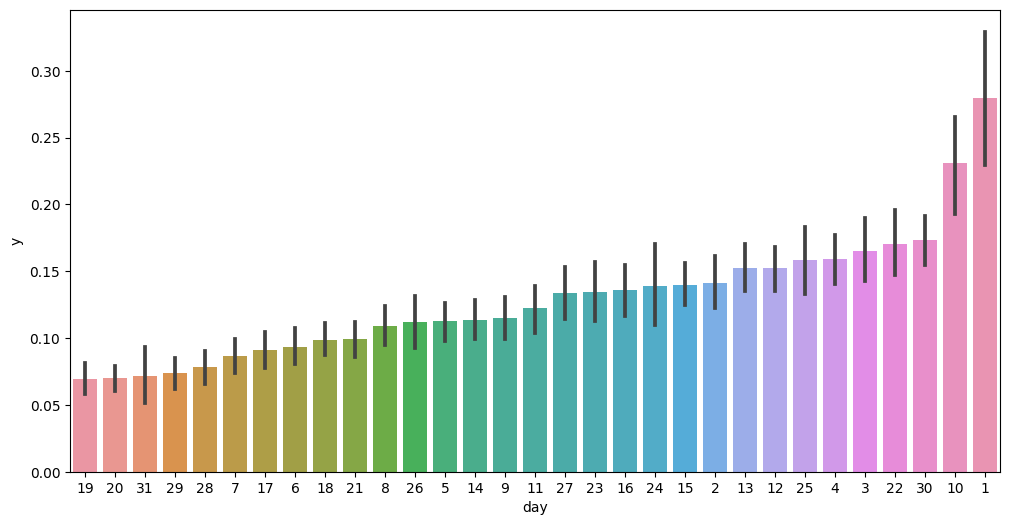

In [70]:
bar_plot('day')

Month beginning(1-5 days) and end of month(last10 days) have higher prob of customer buying the insurance hence contacting at that point of time rather than at mid of month is prefferable.

month - column comapring with target

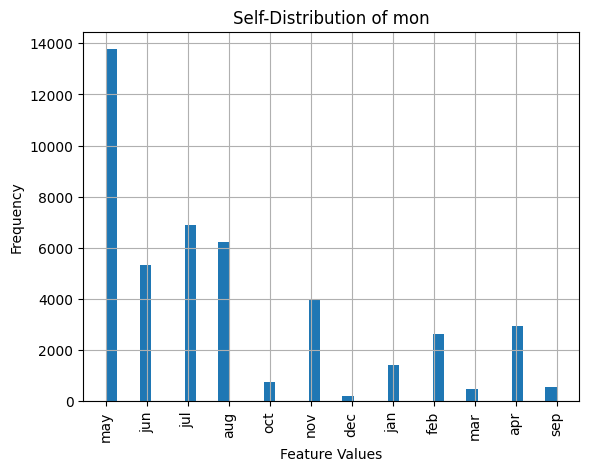

In [71]:
feature_dist('mon')

In [72]:
prob('mon')

,mon,y
8,may,0.067199
5,jul,0.090949
4,jan,0.101212
9,nov,0.101511
6,jun,0.102266
1,aug,0.110168
3,feb,0.166478
0,apr,0.196794
10,oct,0.437669
11,sep,0.464594


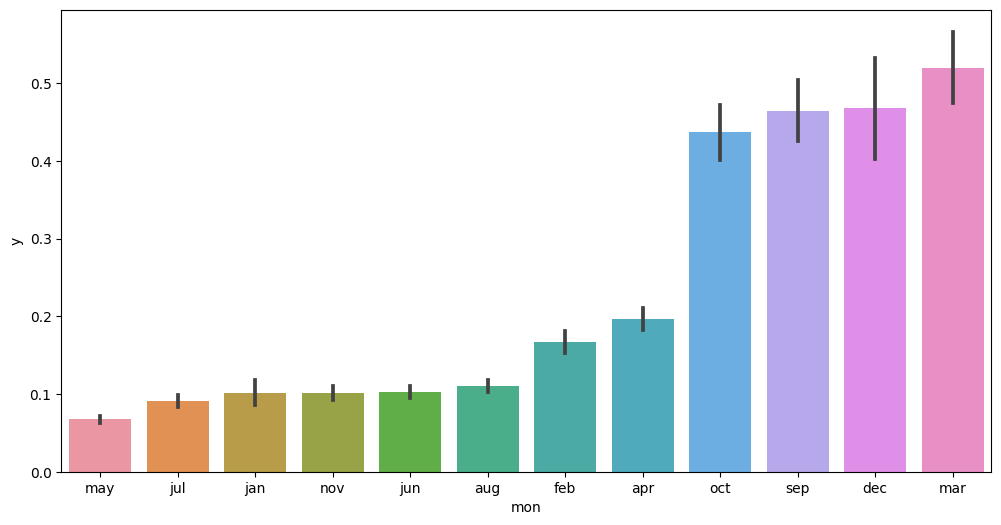

In [73]:
bar_plot('mon')

end of 4 financial quarters were appealing to be greater prob of buying the product especially mar(end of final quarter of year) have higher conversion rate

Dur - column self distribution and comparision with target

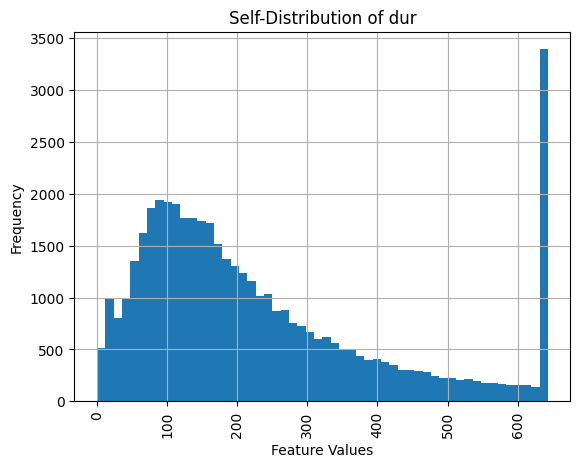

In [74]:
feature_dist('dur')

In [75]:
prob('dur')

,dur,y
0,0,0.000000
37,37,0.000000
38,38,0.000000
40,40,0.000000
41,41,0.000000
...,...,...
587,587,0.500000
555,555,0.500000
643,643,0.509085
562,562,0.526316


In [76]:
#bar_plot('dur')

num_calls - column comparision with target

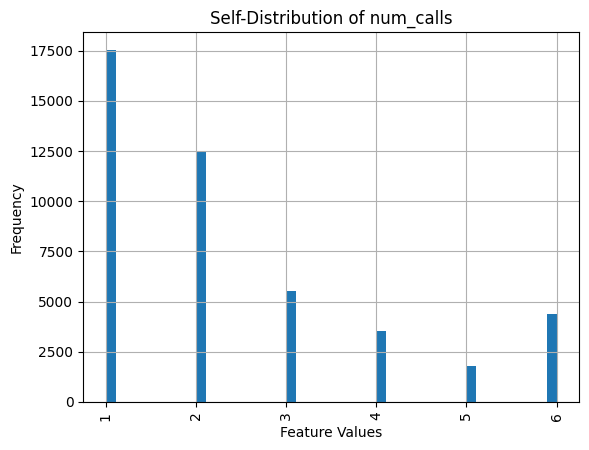

In [77]:
feature_dist('num_calls')

In [78]:
prob('num_calls')


,num_calls,y
5,6,0.058094
4,5,0.078798
3,4,0.090057
2,3,0.111936
1,2,0.112053
0,1,0.145992


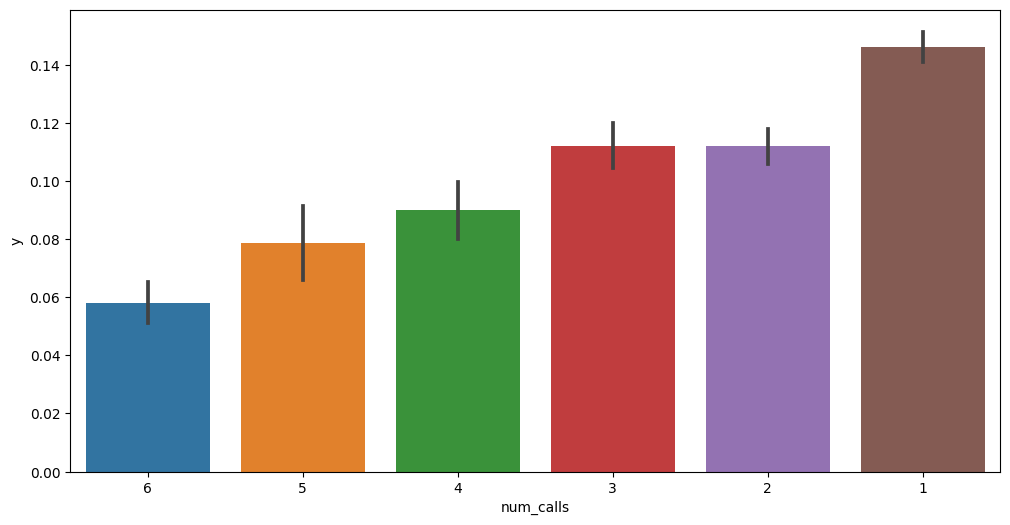

In [79]:
bar_plot('num_calls')

prev_outcome - column comparision with target

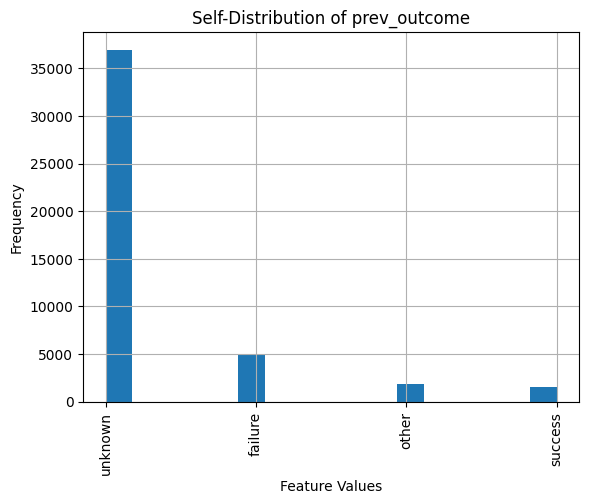

In [80]:
feature_dist('prev_outcome')

In [81]:
prob('prev_outcome')

,prev_outcome,y
3,unknown,0.091630
0,failure,0.126097
1,other,0.166848
2,success,0.647253


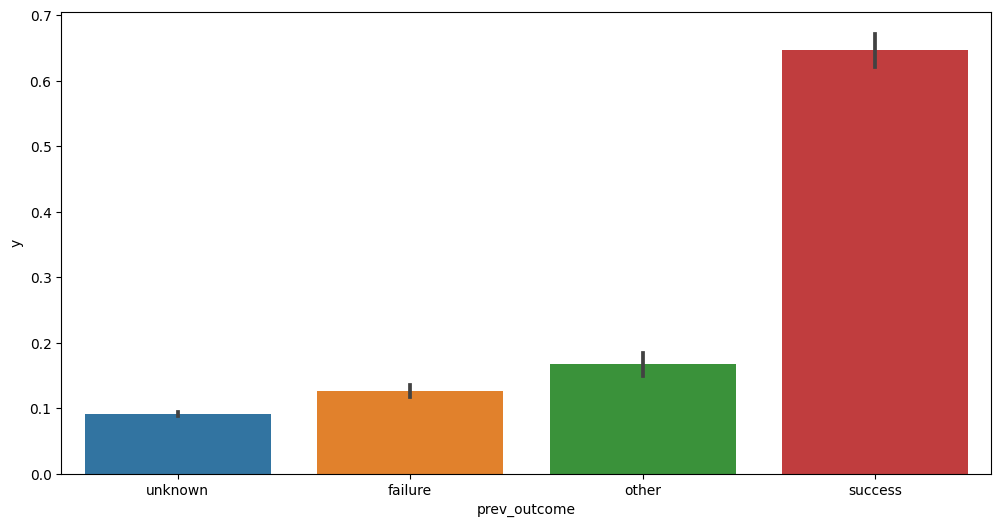

In [82]:
bar_plot('prev_outcome')

It can be seen that prev_outcome also plays a vital role as customer who made a insurance purchase before were willing to buy new product it is because of their prev_experience and awareness

#ENCODING

encoding is done for cat-variable for efficient model,label encoding is done for cat where certain order is present and one hot encoding is done if cat does not hold any order, here encoding is done for features namely,


1.   job - label encoding
2.   marital - label encoding
3.   education_qual - label encoding
4.   call_type - label encoding
5.   mon - label encoding
5.   prev_outcome - label encoding





In [83]:
data.shape

(45205, 11)

In [84]:
data.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,0
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,0
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,0
8,58,retired,married,primary,unknown,5,may,50,1,unknown,0
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,0


onehot encoding

label_encoding

In [85]:
# Encoding the 'eduaction_qual' column
data['job'] = data['job'].map({'management':8, 'technician':4, 'entrepreneur':2, 'blue-collar':0,'unknown':5, 'retired':9, 'admin.':7, 'services':3, 'self-employed':6,'unemployed':10, 'housemaid':1, 'student':11})
data['marital'] = data['marital'].map({'married':0, 'single':2, 'divorced':1})
data['education_qual'] = data['education_qual'].map({'unknown': 2, 'primary': 0,'secondary':1,'tertiary':3})
data['call_type'] = data['call_type'].map({'unknown': 0, 'telephone': 1,'cellular':2})
data['mon'] = data['mon'].map({'may':0, 'jun':4, 'jul':1, 'aug':5, 'oct':9, 'nov':3, 'dec':8, 'jan':2, 'feb':6,'mar':11, 'apr':7, 'sep':10})
data['prev_outcome'] = data['prev_outcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})



In [86]:
data.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,0,3,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,2,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
5,35,8,0,3,0,5,0,139,1,0,0
6,28,8,2,3,0,5,0,217,1,0,0
7,42,2,1,3,0,5,0,380,1,0,0
8,58,9,0,0,0,5,0,50,1,0,0
9,43,4,2,1,0,5,0,55,1,0,0


<Axes: >

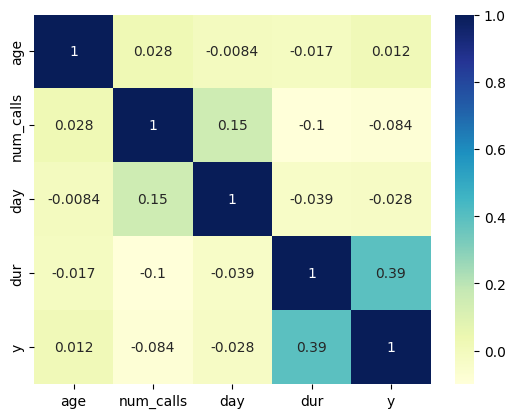

In [87]:
import  seaborn as sns
heat = data[['age','num_calls','day','dur','y']].corr()
sns.heatmap(heat, annot=True, cmap="YlGnBu")

As there were no strong.correlation between any two features hence no features need to be dropped.

# model building

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(['y'],axis = 1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)


In [89]:
X_train.shape

(36164, 10)

In [90]:
X_test.shape

(9041, 10)

scaling the dataset using standard scaler

In [91]:
'''from sklearn.preprocessing import StandardScaler ## standrard scaling
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data'''

'from sklearn.preprocessing import StandardScaler ## standrard scaling\nscaler = StandardScaler() #initialise to a variable\nscaler.fit(X_train) # we are finding the values of mean and sd from the td\nX_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data\nX_test_scaled = scaler.transform(X_test) # transform the test data'

2d plot of target distribution in scatter plot

In [92]:
!pip install imblearn

In [93]:
'''import numpy as np
def plot_2d_space(X_, y_, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_[y_==l, 0],
            X_[y_==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()'''

"import numpy as np\ndef plot_2d_space(X_, y_, label='Classes'):\n    colors = ['#1F77B4', '#FF7F0E']\n    markers = ['o', 's']\n    for l, c, m in zip(np.unique(y), colors, markers):\n        plt.scatter(\n            X_[y_==l, 0],\n            X_[y_==l, 1],\n            c=c, label=l, marker=m\n        )\n    plt.title(label)\n    plt.legend(loc='upper right')\n    plt.show()"

In [94]:
#plot_2d_space(X_, y_, 'Imbalanced dataset (2 Features)')

# SMOTE - Technique :
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picing a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.Here SMOTEENN is used,which syntetically creates new data points by SMOTE and removes the misclassified dataset thus reduces the noise of dataset.

In [95]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)


In [96]:
y_smt.value_counts()

1    30242
0    23485
Name: y, dtype: int64

Now , imbalanced dataset is balanced using the SMOTEENN method now we can

# Logistic Regression

In [98]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

log = LogisticRegression()
log.fit(X_smt,y_smt)

# Calculate AUROC score
y_pred_proba = log.predict_proba(X_test)[:, 1]
auroc_score = roc_auc_score(y_test, y_pred_proba)
print("AUROC Score:", auroc_score)

# Calculate F1 score
y_pred = log.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate Precision score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

# Calculate Recall score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)




AUROC Score: 0.8806325682150182
F1 Score: 0.4467321043811348
Precision Score: 0.2991343379288233
Recall Score: 0.8818525519848771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN algorithm

In knn we'll find the best paarameter first by cross-val and then model will be evaluated

In [99]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt)
  train_accu = f1_score(y_train, knn.predict(X_train))
  cv_accu = cross_val_score(knn, X_train, y_train,scoring='f1')
  print("para : ",i, " Training Accuracy : ", train_accu , " Cross val score : " ,np.mean(cv_accu))


para :  1  Training Accuracy :  0.5848042977743668  Cross val score :  0.3667900407574831
para :  2  Training Accuracy :  0.6106065045414591  Cross val score :  0.22427014197199058
para :  3  Training Accuracy :  0.5487132352941176  Cross val score :  0.3515153950746365
para :  4  Training Accuracy :  0.5655603917301415  Cross val score :  0.2410225091933793
para :  5  Training Accuracy :  0.5271013851116312  Cross val score :  0.3305802665865105
para :  6  Training Accuracy :  0.5398852971845672  Cross val score :  0.24477594823778678
para :  7  Training Accuracy :  0.5103007195129451  Cross val score :  0.31851396224669254
para :  8  Training Accuracy :  0.5218163368848301  Cross val score :  0.2506502875076857
para :  9  Training Accuracy :  0.4987609549712904  Cross val score :  0.3105378214652467
para :  10  Training Accuracy :  0.5092264678471575  Cross val score :  0.2459509541430414
para :  20  Training Accuracy :  0.473518397432087  Cross val score :  0.24939172318509262


It is seen that k=5 have best train and cv score hence we'll take it as our parameter for evaluation.

In [100]:

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

knn = KNeighborsClassifier(1) #k-value = 10
knn.fit(X_smt,y_smt)


# Calculate AUROC score
knn_y_pred_proba = knn.predict_proba(X_test)[:, 1]
auroc_score = roc_auc_score(y_test, knn_y_pred_proba)
print("AUROC Score:", auroc_score)

# Calculate F1 score
knn_y_pred = knn.predict(X_test)
f1 = f1_score(y_test, knn_y_pred)
print("F1 Score:", f1)

# Calculate Precision score
precision = precision_score(y_test, knn_y_pred)
print("Precision Score:", precision)

# Calculate Recall score
recall = recall_score(y_test, knn_y_pred)
print("Recall Score:", recall)




AUROC Score: 0.7447320120473397
F1 Score: 0.427906976744186
Precision Score: 0.3089840470193115
Recall Score: 0.6956521739130435


# Decision tree alogorithm

Here we'll find the best parameter first by cross-val score and then model will be evaluated

In [101]:
#from sklearn.neighbors import DecisionTressClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_smt, y_smt)
  train_accu = f1_score(y_train, dt.predict(X_train))
  cv_accu = cross_val_score(dt, X_train, y_train,cv = 10,scoring='f1')
  print("Depth  : ", depth, " Training Accuracy : ", train_accu , " Cross val score : " ,np.mean(cv_accu))

Depth  :  1  Training Accuracy :  0.34792934540596704  Cross val score :  0.0
Depth  :  2  Training Accuracy :  0.33801969130229154  Cross val score :  0.4958563098188546
Depth  :  3  Training Accuracy :  0.39959929877285244  Cross val score :  0.47282040455366936
Depth  :  4  Training Accuracy :  0.40543705136689917  Cross val score :  0.520552357119065
Depth  :  5  Training Accuracy :  0.4624270353302611  Cross val score :  0.4597583105113996
Depth  :  6  Training Accuracy :  0.4464244916609549  Cross val score :  0.47999023573781663
Depth  :  7  Training Accuracy :  0.4587198515769944  Cross val score :  0.4679456882877675
Depth  :  8  Training Accuracy :  0.48283405237892696  Cross val score :  0.4731058064448076
Depth  :  9  Training Accuracy :  0.5136339800734138  Cross val score :  0.4748250815888103
Depth  :  10  Training Accuracy :  0.5341547627107168  Cross val score :  0.47454833759273934
Depth  :  20  Training Accuracy :  0.6783462955382726  Cross val score :  0.46842957745

here depth = 9 is considered to be good parameter

In [102]:

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score



dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)


dt_y_pred_prob = dt.predict_proba(X_test)[:, 1]
auroc_score = roc_auc_score(y_test, dt_y_pred_prob)
print("AUROC Score:", auroc_score)


dt_y_pred = dt.predict(X_test)
f1 = f1_score(y_test, dt_y_pred)
print("F1 Score:", f1)


precision = precision_score(y_test, dt_y_pred)
print("Precision Score:", precision)

recall = recall_score(y_test, dt_y_pred)
print("Recall Score:", recall)


AUROC Score: 0.8721435934157816
F1 Score: 0.5210355987055016
Precision Score: 0.6067839195979899
Recall Score: 0.45652173913043476


# Random forest model

Here cross-val metric is same as decision tree hence we'll consider parameter as 8

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

model = RandomForestClassifier(n_estimators= 100, max_depth = 9, max_features='sqrt')
model.fit(X_smt, y_smt)

ran_y_pred_prob = model.predict_proba(X_test)[:, 1]
auroc_score = roc_auc_score(y_test, ran_y_pred_prob)
print("AUROC Score:", auroc_score)


ran_y_pred = model.predict(X_test)
f1 = f1_score(y_test, ran_y_pred)
print("F1 Score:", f1)


precision = precision_score(y_test, ran_y_pred)
print("Precision Score:", precision)

recall = recall_score(y_test, ran_y_pred)
print("Recall Score:", recall)

AUROC Score: 0.9053247484553069
F1 Score: 0.4795234549516009
Precision Score: 0.32514304947829015
Recall Score: 0.9130434782608695


# XG-Boost Algorithm

In [104]:
import xgboost as xgb


for para in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.5, 0.7, 1]:
    model = xgb.XGBClassifier(learning_rate=para, n_estimators=100, verbosity=0)
    model.fit(X_smt, y_smt)
    train_accu = f1_score(y_train, model.predict(X_train))
    cv_accu = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
    print("Learning rate:", para, "Train F1 score:", train_accu, "Cross-Val F1 score:", np.mean(cv_accu))


Learning rate: 0.01 Train F1 score: 0.4882822238843182 Cross-Val F1 score: 0.4906140943168545
Learning rate: 0.02 Train F1 score: 0.4988937353815032 Cross-Val F1 score: 0.4882227210734026
Learning rate: 0.03 Train F1 score: 0.5093792303229548 Cross-Val F1 score: 0.48469383068014016
Learning rate: 0.04 Train F1 score: 0.518714106541686 Cross-Val F1 score: 0.4896710631680974
Learning rate: 0.05 Train F1 score: 0.5258215962441314 Cross-Val F1 score: 0.49974954388719983
Learning rate: 0.06 Train F1 score: 0.5364152362716268 Cross-Val F1 score: 0.5079874920466794
Learning rate: 0.07 Train F1 score: 0.5426677713338857 Cross-Val F1 score: 0.5148476622364256
Learning rate: 0.08 Train F1 score: 0.5499055745960691 Cross-Val F1 score: 0.5218283149345524
Learning rate: 0.09 Train F1 score: 0.5592235760838764 Cross-Val F1 score: 0.5184729762531847
Learning rate: 0.1 Train F1 score: 0.5640878837758534 Cross-Val F1 score: 0.5242978628575126
Learning rate: 0.11 Train F1 score: 0.5704984446212833 Cross

In [105]:
xg_model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100)
xg_model.fit(X_smt,y_smt)

xg_y_pred_prob = xg_model.predict_proba(X_test)[:, 1]
auroc_score = roc_auc_score(y_test, xg_y_pred_prob)
print("AUROC Score:", auroc_score)


xg_y_pred = xg_model.predict(X_test)
f1 = f1_score(y_test, xg_y_pred)
print("F1 Score:", f1)


precision = precision_score(y_test, xg_y_pred)
print("Precision Score:", precision)

recall = recall_score(y_test, xg_y_pred)
print("Recall Score:", recall)

AUROC Score: 0.9175098454726691
F1 Score: 0.5543183869996992
Precision Score: 0.4066225165562914
Recall Score: 0.8705103969754253


# Model_Evaluation

1.) Log.Reg  Algorithm:
* AUROC Score: 0.8636780616276507
* F1 Score: 0.43129062209842145
* Precision Score: 0.28584615384615386
* Recall Score: 0.8780718336483931
2.) Knn  Algorithm:
* AUROC Score: 0.7536656344637835
* F1 Score: 0.43349473084591283
* Precision Score: 0.31023236852833264
* Recall Score: 0.719281663516068
3.) Desision Tree  Algorithm:
* AUROC Score: 0.8741310990012567
* F1 Score: 0.4879097259537883
* Precision Score: 0.5653798256537983
* Recall Score: 0.42911153119092627
4.) Random.Forest Algorithm:
* AUROC Score: 0.9043541722758215
* F1 Score: 0.4924318869828457
* Precision Score: 0.3358568479008947
* Recall Score: 0.9224952741020794
5.) Xg-Boost Algorithm:
* AUROC Score: 0.9111613478263237
* F1 Score: 0.554449472096531
* Precision Score: 0.4071776694727514
* Recall Score: 0.8686200378071833


It can be observed that Xg_boost performs well in terms of auroc_score and f1 score.

# Feature importance

In [109]:
import xgboost as xgb

# Create and fit the XGBoost model
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train)
# Get the feature importance
feature_importance = xg_model.feature_importances_

# Print feature importance for each feature
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: age, Importance: 0.04432150721549988
Feature: job, Importance: 0.044380705803632736
Feature: marital, Importance: 0.04293829947710037
Feature: education_qual, Importance: 0.035303421318531036
Feature: call_type, Importance: 0.1794147491455078
Feature: day, Importance: 0.055654190480709076
Feature: mon, Importance: 0.13207948207855225
Feature: dur, Importance: 0.16440626978874207
Feature: num_calls, Importance: 0.040420740842819214
Feature: prev_outcome, Importance: 0.26108062267303467


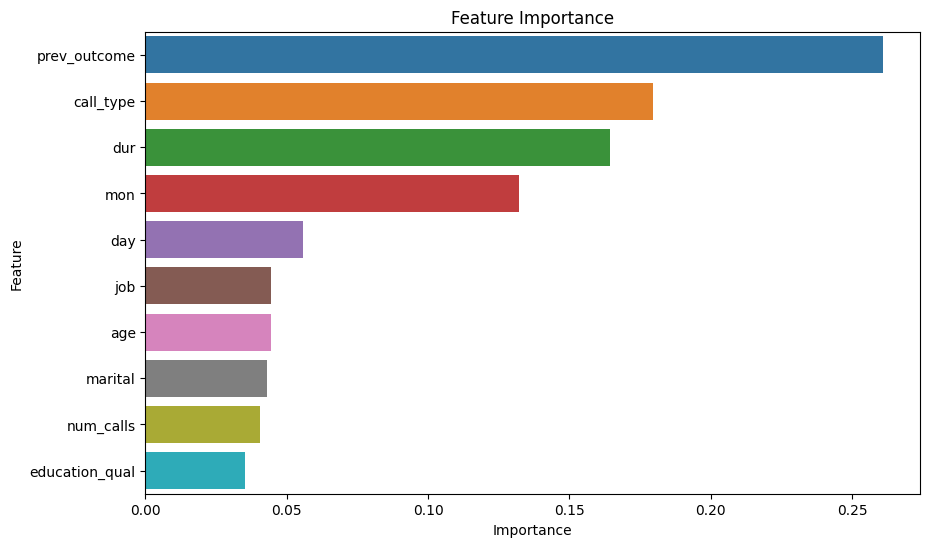

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with feature names and importance values
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


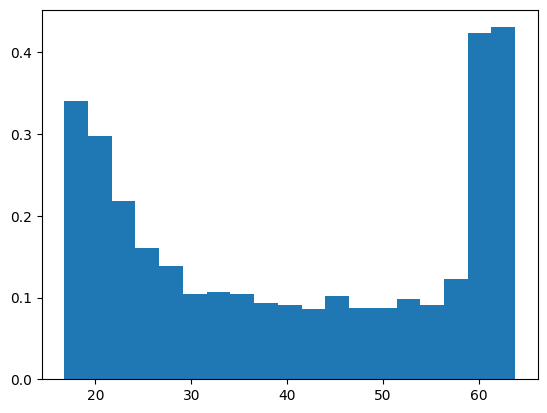

In [111]:
#conversion histgram
bins=np.linspace(data.age.min(),data.age.max(),20)
c=np.digitize(data.age,bins)
plt.bar(bins[:-1], [np.mean(data.y.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.show()

# Fitting the Finalised model

In [112]:
#finalizing the best fit hyper parameters to fit the model

import xgboost as xgb
X_= data.drop(['y'],axis =1)
Y_ = data['y']
# Initialize the Xg_boost with the best hyperparameters
xgb_model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100)
xgb_model.fit(X_,Y_)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Predict over the unseen data

In [113]:
#case 1
#data used for prediction is age:45, job:manager, marital:married, edu_qual:tertiary, call_type:unknown, day:10, mon:oct, dur:200,num_calls:2,prev_outcome:unknown
input_data = np.array([45, 8, 0, 3, 0, 10, 9, 200, 2, 0]).reshape(1, -1)
prediction = xgb_model.predict(input_data)
print(prediction)


[1]


In [114]:
#case2
#data used for prediction is age:30, job:housemaid, marital:divorced, edu_qual:primary, call_type:cellular, day:20, mon:march, dur:50,num_calls:1,prev_outcome:unknown
input_data = np.array([30, 1, 1, 0, 2, 20, 11, 50, 1, 0]).reshape(1, -1)
prediction = xgb_model.predict(input_data)
print(prediction)


[0]


From above inputs case 1 can be converted into a customer as per the predictions of the model and case 2 can't be converted.